In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
sns.set()
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [64]:
train_values = pd.read_csv("pathname", index_col = 0)
train_labels = pd.read_csv("pathname", index_col = 0)

In [65]:
train_values.describe()

,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,demo__pct_hispanic,demo__pct_non_hispanic_african_american,demo__pct_non_hispanic_white,...,health__pct_adult_smoking,health__pct_diabetes,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician
count,3198.000000,3198.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,3196.000000,...,2734.000000,3196.000000,3016.000000,2220.000000,3196.000000,3170.000000,1231.000000,2781.000000,2954.000000,2968.000000
mean,0.467191,0.059696,0.217463,0.086067,0.498811,0.227715,0.170043,0.090207,0.091046,0.769989,...,0.213628,0.109260,0.083896,0.164841,0.277161,11.625868,5.947498,21.132618,3431.433649,2551.339286
std,0.074400,0.022947,0.067362,0.039849,0.024399,0.034282,0.043694,0.142763,0.147165,0.207850,...,0.062895,0.023216,0.022251,0.050474,0.053003,1.557996,5.031822,10.485923,2569.450603,2100.459467
min,0.207000,0.010000,0.046000,0.012000,0.278000,0.092000,0.045000,0.000000,0.000000,0.053000,...,0.046000,0.032000,0.033000,0.038000,0.090000,7.000000,-0.400000,3.140000,339.000000,189.000000
25%,0.420000,0.044000,0.166000,0.057000,0.493000,0.206000,0.141000,0.019000,0.006000,0.649000,...,0.172000,0.094000,0.069000,0.130000,0.242750,10.000000,2.620000,13.490000,1812.250000,1420.000000
50%,0.468000,0.057000,0.216000,0.077000,0.503000,0.226000,0.167000,0.035000,0.022000,0.853000,...,0.210000,0.109000,0.081000,0.164000,0.280000,12.000000,4.700000,19.630000,2690.000000,1999.000000
75%,0.514000,0.072000,0.261000,0.106000,0.512000,0.246000,0.195000,0.087000,0.096000,0.936250,...,0.249000,0.124000,0.095000,0.197000,0.313000,13.000000,7.890000,26.490000,4089.750000,2859.000000
max,1.000000,0.248000,0.496000,0.281000,0.573000,0.417000,0.346000,0.932000,0.858000,0.990000,...,0.513000,0.203000,0.238000,0.367000,0.442000,15.000000,50.490000,110.450000,28130.000000,23399.000000


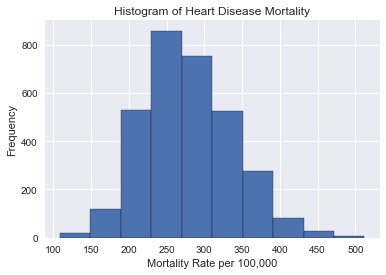

In [103]:
# Mortality Rates
train_labels.hist(edgecolor = 'k')
plt.title("Histogram of Heart Disease Mortality")
plt.ylabel("Frequency")
plt.xlabel("Mortality Rate per 100,000")
plt.show()

In [67]:
# Create a Joined Data Frame
train_combined = train_values.join(train_labels)
train_combined.head()

,area__rucc,area__urban_influence,econ__economic_typology,econ__pct_civilian_labor,econ__pct_unemployment,econ__pct_uninsured_adults,econ__pct_uninsured_children,demo__pct_female,demo__pct_below_18_years_of_age,demo__pct_aged_65_years_and_older,...,health__pct_low_birthweight,health__pct_excessive_drinking,health__pct_physical_inacticity,health__air_pollution_particulate_matter,health__homicides_per_100k,health__motor_vehicle_crash_deaths_per_100k,health__pop_per_dentist,health__pop_per_primary_care_physician,yr,heart_disease_mortality_per_100k
row_id,,,,,,,,,,,,,,,,,,,,,
0,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Manufacturing-dependent,0.408,0.057,0.254,0.066,0.516,0.235,0.176,...,0.089,NaN,0.332,13.0,2.80,15.09,1650.0,1489.0,a,312
1,Metro - Counties in metro areas of fewer than ...,Small-in a metro area with fewer than 1 millio...,Mining-dependent,0.556,0.039,0.260,0.143,0.503,0.272,0.101,...,0.082,0.181,0.265,10.0,2.30,19.79,2010.0,2480.0,a,257
4,Metro - Counties in metro areas of 1 million p...,Large-in a metro area with at least 1 million ...,Nonspecialized,0.541,0.057,0.070,0.023,0.522,0.179,0.115,...,0.098,0.195,0.209,10.0,9.31,3.14,629.0,690.0,b,195
5,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore adjacent to a small metro with town of...,Nonspecialized,0.500,0.061,0.203,0.059,0.525,0.200,0.164,...,0.058,NaN,0.238,13.0,NaN,NaN,1810.0,6630.0,b,218
6,"Nonmetro - Urban population of 2,500 to 19,999...",Noncore not adjacent to a metro/micro area and...,Nonspecialized,0.471,0.050,0.225,0.103,0.511,0.237,0.171,...,0.070,0.194,0.290,9.0,NaN,29.39,3489.0,2590.0,a,355


## Area 

In [68]:
#Subsetting Non-Metro and Metro
metro = ["Metro - Counties in metro areas of 1 million population or more", 
         "Metro - Counties in metro areas of 250,000 to 1 million population", 
         "Metro - Counties in metro areas of fewer than 250,000 population"]
nonMetro = ["Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area", 
            "Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area", 
            "Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area",
            "Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area",
           "Nonmetro - Urban population of 20,000 or more, adjacent to a metro area",
           "Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area"]

In [69]:
metroDF = train_combined[train_combined.area__rucc == "Metro - Counties in metro areas of 1 million population or more"]
metroDF = metroDF.append(train_combined[train_combined.area__rucc == "Metro - Counties in metro areas of 250,000 to 1 million population"])
metroDF = metroDF.append(train_combined[train_combined.area__rucc == "Metro - Counties in metro areas of fewer than 250,000 population"])

nonMetroDF = train_combined[train_combined.area__rucc == "Nonmetro - Urban population of 2,500 to 19,999, adjacent to a metro area"]
nonMetroDF = nonMetroDF.append(train_combined[train_combined.area__rucc == "Nonmetro - Completely rural or less than 2,500 urban population, not adjacent to a metro area"])  
nonMetroDF = nonMetroDF.append(train_combined[train_combined.area__rucc == "Nonmetro - Urban population of 2,500 to 19,999, not adjacent to a metro area"])
nonMetroDF = nonMetroDF.append(train_combined[train_combined.area__rucc == "Nonmetro - Completely rural or less than 2,500 urban population, adjacent to a metro area"])
nonMetroDF = nonMetroDF.append(train_combined[train_combined.area__rucc == "Nonmetro - Urban population of 20,000 or more, adjacent to a metro area"])
nonMetroDF = nonMetroDF.append(train_combined[train_combined.area__rucc == "Nonmetro - Urban population of 20,000 or more, not adjacent to a metro area"])

In [70]:
metroed = pd.DataFrame([nonMetroDF.heart_disease_mortality_per_100k.mean(), 
                        metroDF.heart_disease_mortality_per_100k.mean()], 
                       index = ['Non-Metro', 'Metro'], 
                       columns = ['Heart Disease Mortality per 100k Mean'])
metroed["Median"] = [nonMetroDF.heart_disease_mortality_per_100k.median(), 
                        metroDF.heart_disease_mortality_per_100k.median()]
print(nonMetroDF.heart_disease_mortality_per_100k.mean())
print(metroDF.heart_disease_mortality_per_100k.mean())
metroed

286.5502415458937
266.1914893617021


,Heart Disease Mortality per 100k Mean,Median
Non-Metro,286.550242,282.0
Metro,266.191489,261.0


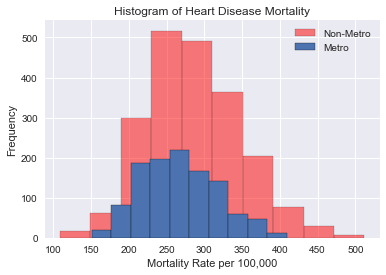

In [71]:
# Mortality Rates
nonMetroDF.heart_disease_mortality_per_100k.hist(color = 'r', 
                                                 alpha=.5, 
                                                 edgecolor = 'k', 
                                                 label = 'Non-Metro')
metroDF.heart_disease_mortality_per_100k.hist(edgecolor = 'k', 
                                              label='Metro')
plt.title("Histogram of Heart Disease Mortality")
plt.ylabel("Frequency")
plt.xlabel("Mortality Rate per 100,000")
plt.legend()
plt.show()

## Economics

In [72]:
econDF = train_combined[['econ__economic_typology',
                        'econ__pct_civilian_labor', 
                        'econ__pct_unemployment',
                        'econ__pct_uninsured_adults', 
                        'econ__pct_uninsured_children', 
                        'heart_disease_mortality_per_100k']]
econDF.columns = ["Typology", 
                  "Civilian Labor", 
                  "Unemployment", 
                  "Uninsured Adults", 
                  "Uninsured Children", 
                  "Heart Disease Rate"]

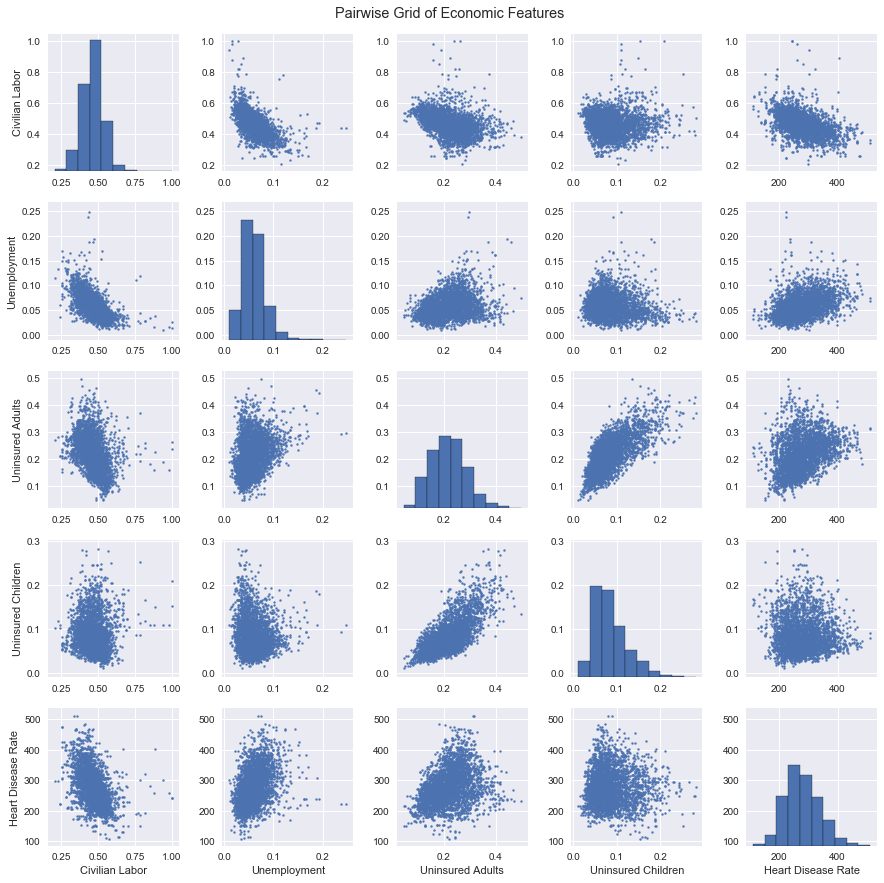

In [73]:
econDF = econDF.fillna(econDF.mean())
g = sns.PairGrid(econDF)
g.map_diag(plt.hist, edgecolor='k')
g.map_offdiag(plt.scatter, s = 4)
g.fig.suptitle('Pairwise Grid of Economic Features')
plt.subplots_adjust(top=.95)
plt.show()

## Health 

In [74]:
healthDF = train_combined[['health__pct_adult_obesity',
       'health__pct_adult_smoking', 'health__pct_diabetes',
       'health__pct_low_birthweight', 'health__pct_excessive_drinking',
       'health__pct_physical_inacticity',
       'health__air_pollution_particulate_matter',
       'health__homicides_per_100k',
       'health__motor_vehicle_crash_deaths_per_100k',
       'health__pop_per_dentist', 'health__pop_per_primary_care_physician', 
                           'heart_disease_mortality_per_100k']]
healthDF.columns = ["Adult Obesity", 
                    "Smoking", 
                    "Diabetes", 
                    "Low Birthweight", 
                    "Drinking", 
                    "Phys. Inactivity", 
                    "Pollution", 
                   "Homicides", 
                   "Vehicle Deaths", 
                   "Pop. Per Dentist", 
                   "Pop. Per Physician", 
                   "Heart Disease Rate"]
healthDF1 = train_combined[['health__pct_adult_obesity',
                            'health__pct_physical_inacticity', 
                            'health__pct_diabetes', 
                            'heart_disease_mortality_per_100k']]
healthDF1.columns = ["Adult Obesity", 
                    "Physical Inactivity", 
                    "Diabetes",  
                   "Heart Disease Rate"]
                            
healthDF2 = train_combined[[
       'health__pct_low_birthweight', 
       'health__pct_excessive_drinking', 
       'health__pct_adult_smoking',
       'heart_disease_mortality_per_100k']]
healthDF2.columns = ["Low Birthweight", 
                    "Drinking", 
                    "Smoking", 
                   "Heart Disease Rate"]
healthDF3 = train_combined[['health__air_pollution_particulate_matter',
       'health__homicides_per_100k',
       'health__motor_vehicle_crash_deaths_per_100k',
       'health__pop_per_dentist', 'health__pop_per_primary_care_physician', 
                           'heart_disease_mortality_per_100k']]
healthDF3.columns = ["Pollution", 
                   "Homicides", 
                   "Vehicle Deaths", 
                   "Pop. Per Dentist", 
                   "Pop. Per Physician", 
                   "Heart Disease Rate"]
                            
                            

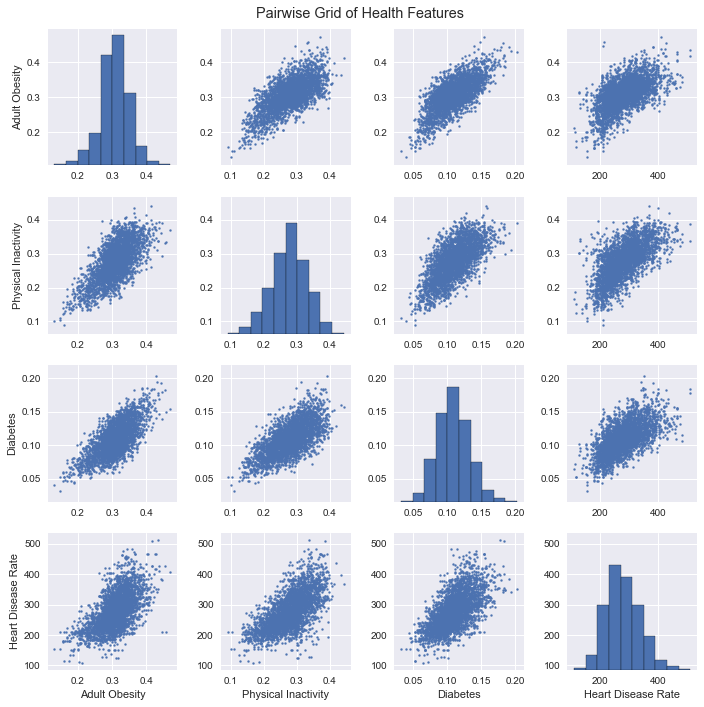

In [75]:
healthDF1 = healthDF1.fillna(healthDF1.mean())

g = sns.PairGrid(healthDF1)
g.map_diag(plt.hist, edgecolor='k')
g.map_offdiag(plt.scatter, s = 4)
g.fig.suptitle('Pairwise Grid of Health Features')
plt.subplots_adjust(top=.95)
plt.show()

In [76]:
# Correlation Coeficients between the above features
healthDF1.corr()

,Adult Obesity,Physical Inactivity,Diabetes,Heart Disease Rate
Adult Obesity,1.000000,0.683851,0.701160,0.593324
Physical Inactivity,0.683851,1.000000,0.674470,0.649810
Diabetes,0.701160,0.674470,1.000000,0.631285
Heart Disease Rate,0.593324,0.649810,0.631285,1.000000


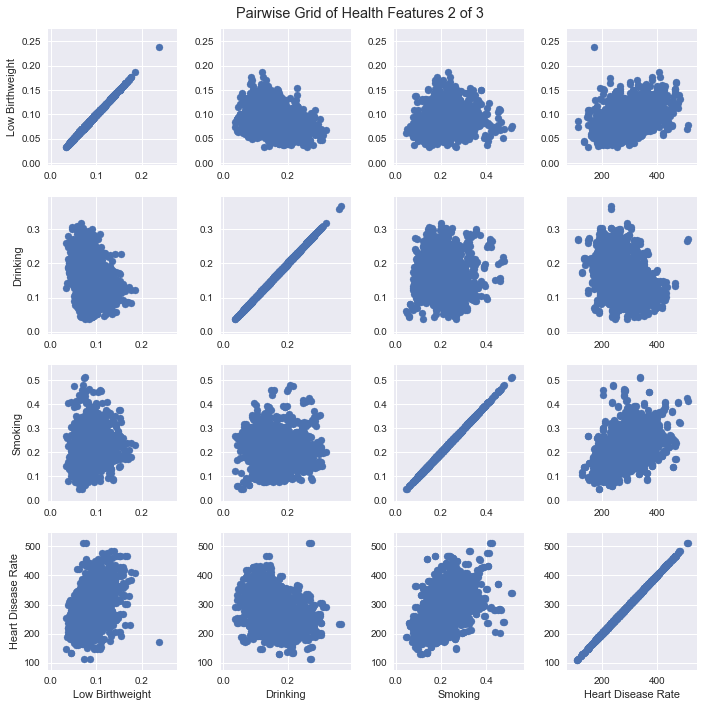

In [77]:
g=sns.PairGrid(healthDF2)
g.map(plt.scatter)
g.fig.suptitle('Pairwise Grid of Health Features 2 of 3')
plt.subplots_adjust(top=.95)
plt.show()

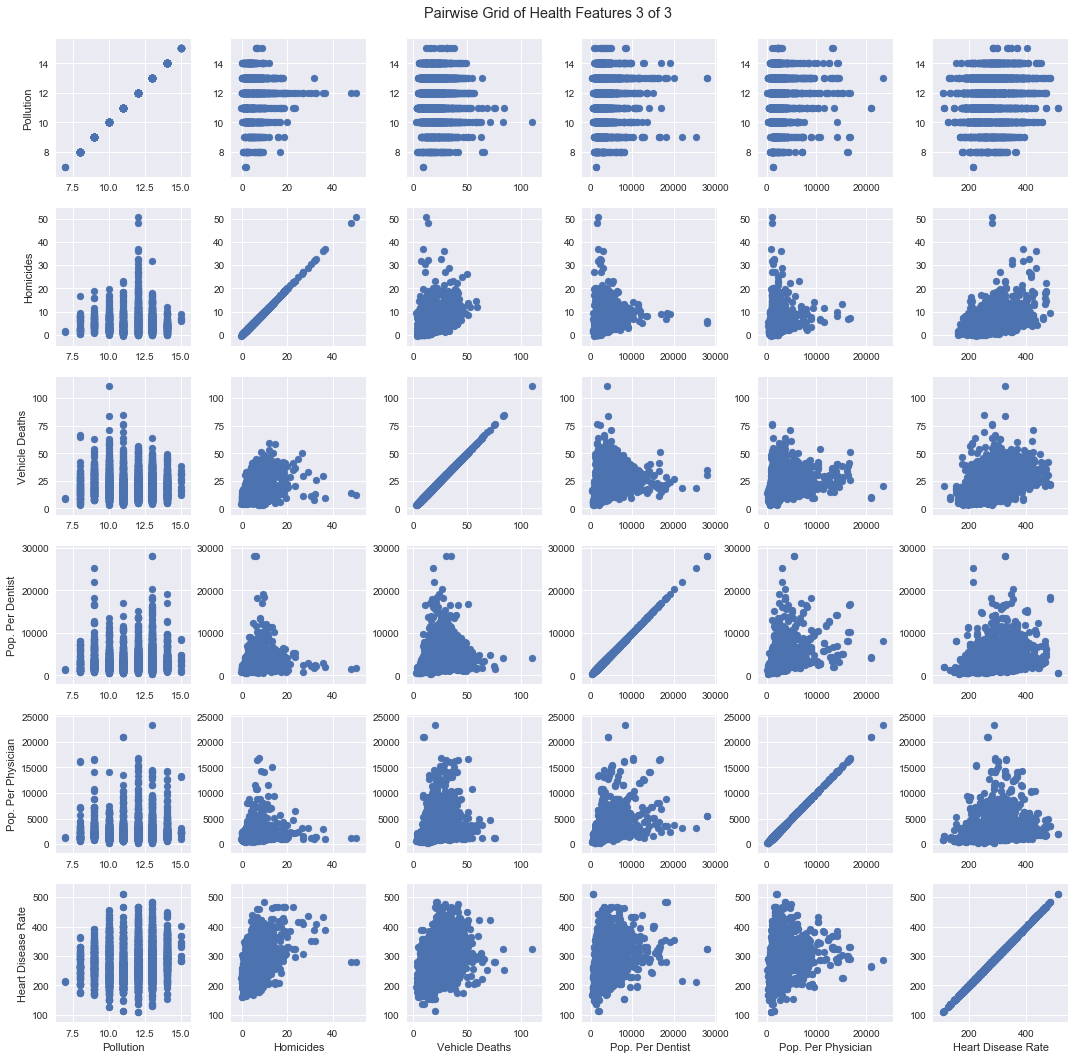

In [78]:
g = sns.PairGrid(healthDF3)
g.map(plt.scatter)
g.fig.suptitle('Pairwise Grid of Health Features 3 of 3')
plt.subplots_adjust(top=.95)
plt.show()

## Demographics

In [79]:
demoDF = train_combined[['demo__pct_female', 'demo__pct_below_18_years_of_age',
       'demo__pct_aged_65_years_and_older', 'demo__pct_hispanic',
       'demo__pct_non_hispanic_african_american',
       'demo__pct_non_hispanic_white',
       'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian',
       'demo__pct_adults_less_than_a_high_school_diploma',
       'demo__pct_adults_with_high_school_diploma',
       'demo__pct_adults_with_some_college',
       'demo__pct_adults_bachelors_or_higher', 'demo__birth_rate_per_1k',
       'demo__death_rate_per_1k','heart_disease_mortality_per_100k']]
demoDF.columns = ["Female", 
                  "Below 18", 
                  "Over 65", 
                  "Hispanic", 
                  "African American", 
                  "White", "Amer. Indian or Alas. Nat.", 
                 "Asian", 
                 "Less than HS", 
                 "W/ HS Diploma", 
                 "Some College", 
                 "Bachelors or Higher", 
                 "Birth Rate per 1k", 
                 "Death Rate per 1k",
                  "Heart Disease Rate"]

demoDF1 = train_combined[['demo__pct_female', 'demo__pct_below_18_years_of_age',
       'demo__pct_aged_65_years_and_older', 'heart_disease_mortality_per_100k']]
demoDF1.columns = ["Female", 
                  "Below 18", 
                  "Over 65", 
                  "Heart Disease Rate"]

demoDF2 = train_combined[['demo__pct_hispanic',
       'demo__pct_non_hispanic_african_american',
       'demo__pct_non_hispanic_white',
       'demo__pct_american_indian_or_alaskan_native', 'demo__pct_asian', 'demo__pct_adults_with_some_college',
       'heart_disease_mortality_per_100k']]
demoDF2.columns = [ "Hispanic", 
                  "African American", 
                  "White", "Amer. Indian or Alas. Nat.", 
                 "Asian", 
                   'Some College',
                  "Heart Disease Rate"]

demoDF3 = train_combined[[
       'demo__pct_adults_less_than_a_high_school_diploma',
       'demo__pct_adults_with_high_school_diploma',
       'demo__pct_adults_bachelors_or_higher', 'heart_disease_mortality_per_100k']]
demoDF3.columns = [ "Less than HS", 
                 "HS Graduate", 
                 "Bachelors or Higher",  
                  "Heart Disease Rate"]
demoDF4 = train_combined[[ 'demo__birth_rate_per_1k',
       'demo__death_rate_per_1k','heart_disease_mortality_per_100k']]
demoDF4.columns = [
                 "Birth Rate per 1k", 
                 "Death Rate per 1k",
                  "Heart Disease Rate"]


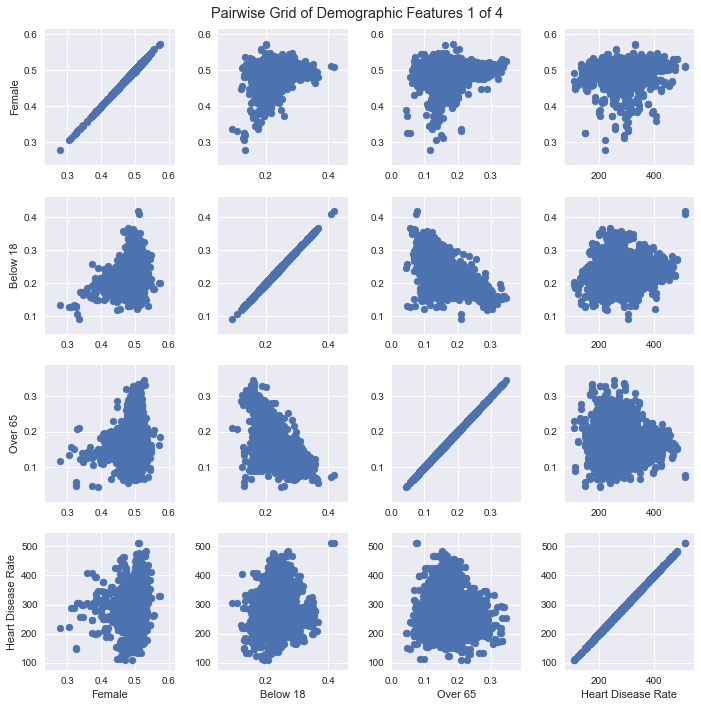

In [80]:
g = sns.PairGrid(demoDF1)
g.map(plt.scatter)
g.fig.suptitle('Pairwise Grid of Demographic Features 1 of 4')
plt.subplots_adjust(top=.95)
plt.show()

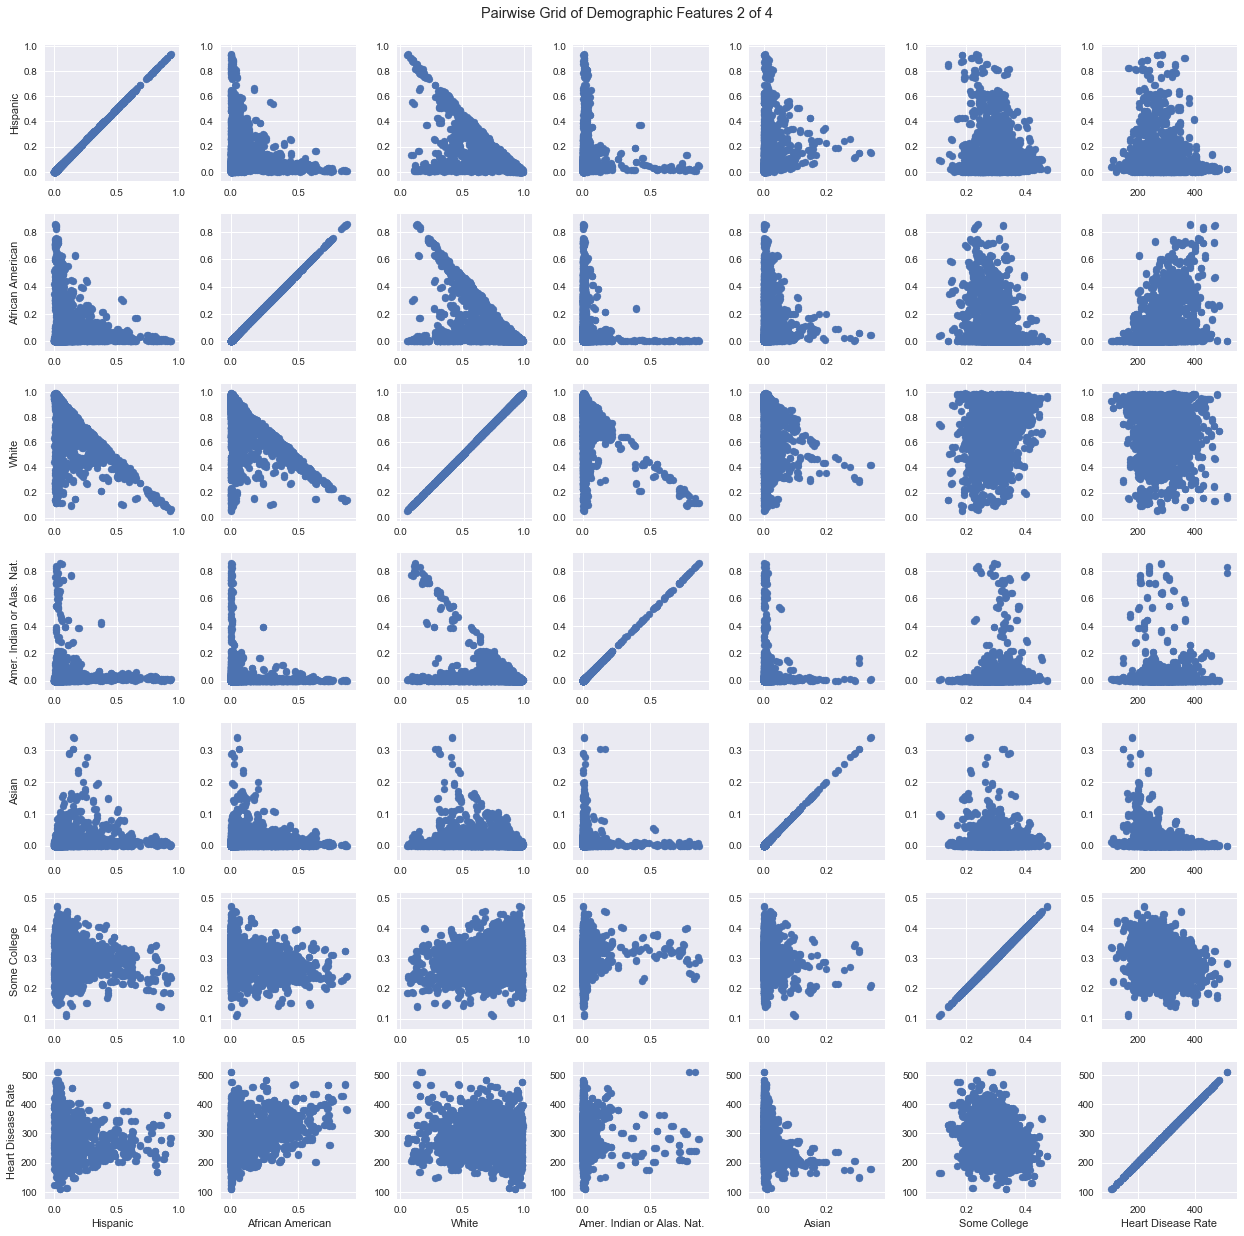

In [81]:
g = sns.PairGrid(demoDF2)
g.map(plt.scatter)
g.fig.suptitle('Pairwise Grid of Demographic Features 2 of 4')
plt.subplots_adjust(top=.95)
plt.show()

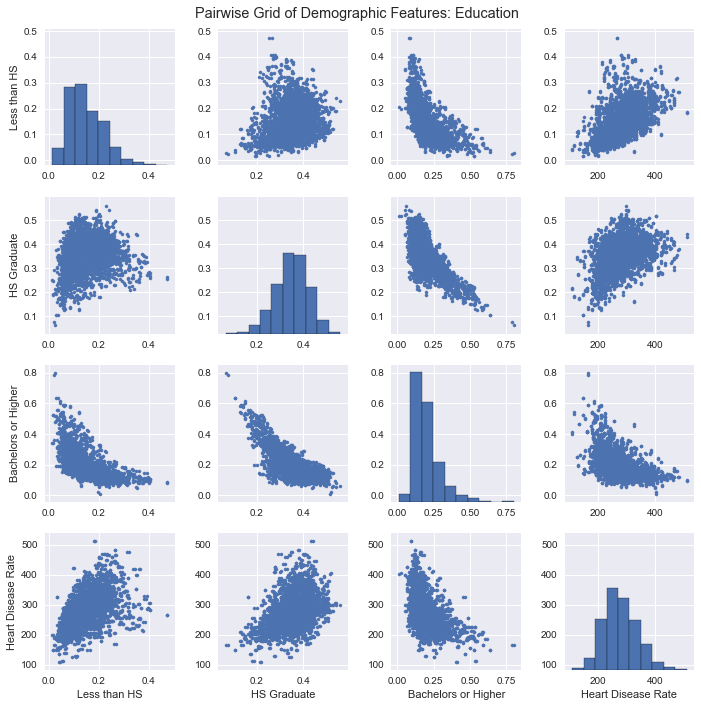

In [82]:
g = sns.PairGrid(demoDF3)
g.map_diag(plt.hist, edgecolor='k')
g.map_offdiag(plt.scatter, s = 10)
g.fig.suptitle('Pairwise Grid of Demographic Features: Education')
plt.subplots_adjust(top=.95)
plt.show()

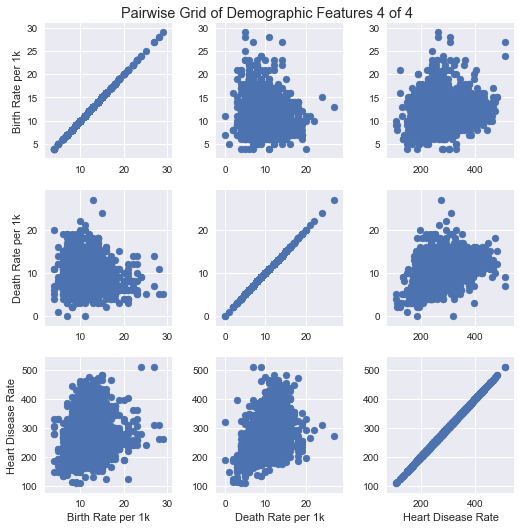

In [83]:
g = sns.PairGrid(demoDF4)
g.map(plt.scatter)
g.fig.suptitle('Pairwise Grid of Demographic Features 4 of 4')
plt.subplots_adjust(top=.95)
plt.show()

## PrePreprocessing



In [84]:
X = pd.get_dummies(train_values, 
                              columns=['area__rucc', 
                                       'area__urban_influence', 
                                       'econ__economic_typology'])
y = train_labels

In [85]:
# Fill NA Values with Means
X = X.fillna(X.median())

## Linear Regression 

In [86]:
# Drop Nothing but year
X = X
X.drop('yr', axis = 1, inplace = True)
y = train_labels

In [87]:
reg = linear_model.LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, )

In [88]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [89]:
a = reg.predict(X_test)

In [90]:
score = np.mean((a-y_test)**2)
print(score**(.5))

heart_disease_mortality_per_100k    32.925203
dtype: float64


## Visualizing Predicted Values

In [91]:
y_test["Predicted"] = a
y_test["Predicted"] = y_test["Predicted"].astype(int)

/Users/andrewdugan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/andrewdugan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


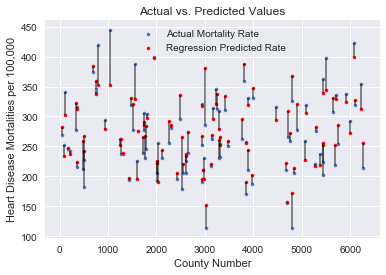

In [92]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes

width = 0.3
xaxis = y_test.index.values[:100]
yaxis1 = y_test.heart_disease_mortality_per_100k.head(100)
yaxis2 = y_test.Predicted.head(100)
plt.scatter(xaxis, yaxis1, s=10, label='Actual Mortality Rate')
plt.scatter(xaxis, yaxis2, s=10, color = 'r', label='Regression Predicted Rate')
plt.vlines(x=xaxis, ymin=yaxis1, ymax=yaxis2, alpha=.5, color='k')
plt.legend()
plt.ylabel('Heart Disease Mortalities per 100,000')
plt.xlabel('County Number')
plt.title('Actual vs. Predicted Values')
plt.show()

## Prepare Test Data

In [93]:
test_values = pd.read_csv("pathname", index_col=0)

In [94]:
X_test = pd.get_dummies(test_values, 
                        columns=['area__rucc', 
                                'area__urban_influence', 
                                'econ__economic_typology'])

In [95]:
# Fill NA Values with Means
X_test = X_test.fillna(X_test.median())

In [96]:
# Drop Nothing but year
X_test.drop('yr', axis = 1, inplace = True)

## Run Test Data

In [97]:
test_labels = reg.predict(X_test)
test_labels

array([[ 188.18609732],
       [ 267.63466377],
       [ 277.4912139 ],
       ..., 
       [ 230.6792545 ],
       [ 291.79487952],
       [ 305.13016405]])

In [98]:
test_labels = pd.DataFrame(test_labels)
test_labels.head()

,0
0,188.186097
1,267.634664
2,277.491214
3,272.407841
4,301.946066


In [99]:
sub_format = pd.read_csv("pathname")

In [100]:
sub_format.heart_disease_mortality_per_100k = test_labels
sub_format.head()

,row_id,heart_disease_mortality_per_100k
0,2,188.186097
1,3,267.634664
2,7,277.491214
3,9,272.407841
4,12,301.946066


In [101]:
sub_format.heart_disease_mortality_per_100k = sub_format.heart_disease_mortality_per_100k.astype(int)

In [102]:
sub_format.to_csv("pathnam", sep=',')